In [2]:
#imports necessary to plot graphs, do calculations, and extract real time stock data
import numpy as np
import pandas as pd
#similar to Yahoo Finance API
import yfinance as yf
import seaborn as sns
#used to extract stock data exactly 200 days before "today"
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
#used to format x-ticks on all the graphs
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from matplotlib.dates import DateFormatter

In [4]:
#creates pandas dataframe for stock data from Yahoo Finance in the past 200 days
#had to make dataframe global because it was used in every single graph plotted
today = date.today()
past_time = today - timedelta(days = 200)
eth_data = yf.download("ETH-USD", past_time,today, interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [5]:
# different colors and price diffferences for volume bar graph at bottom of plots and candlestick plots
decrease_color = "red"
increase_color = "#50C878"
eth_stock_up = eth_data[eth_data.Close >= eth_data.Open]
eth_stock_down = eth_data[eth_data.Close <= eth_data.Open]

Get your wallet ready! It looks like you will be able to buy some stock pretty soon!


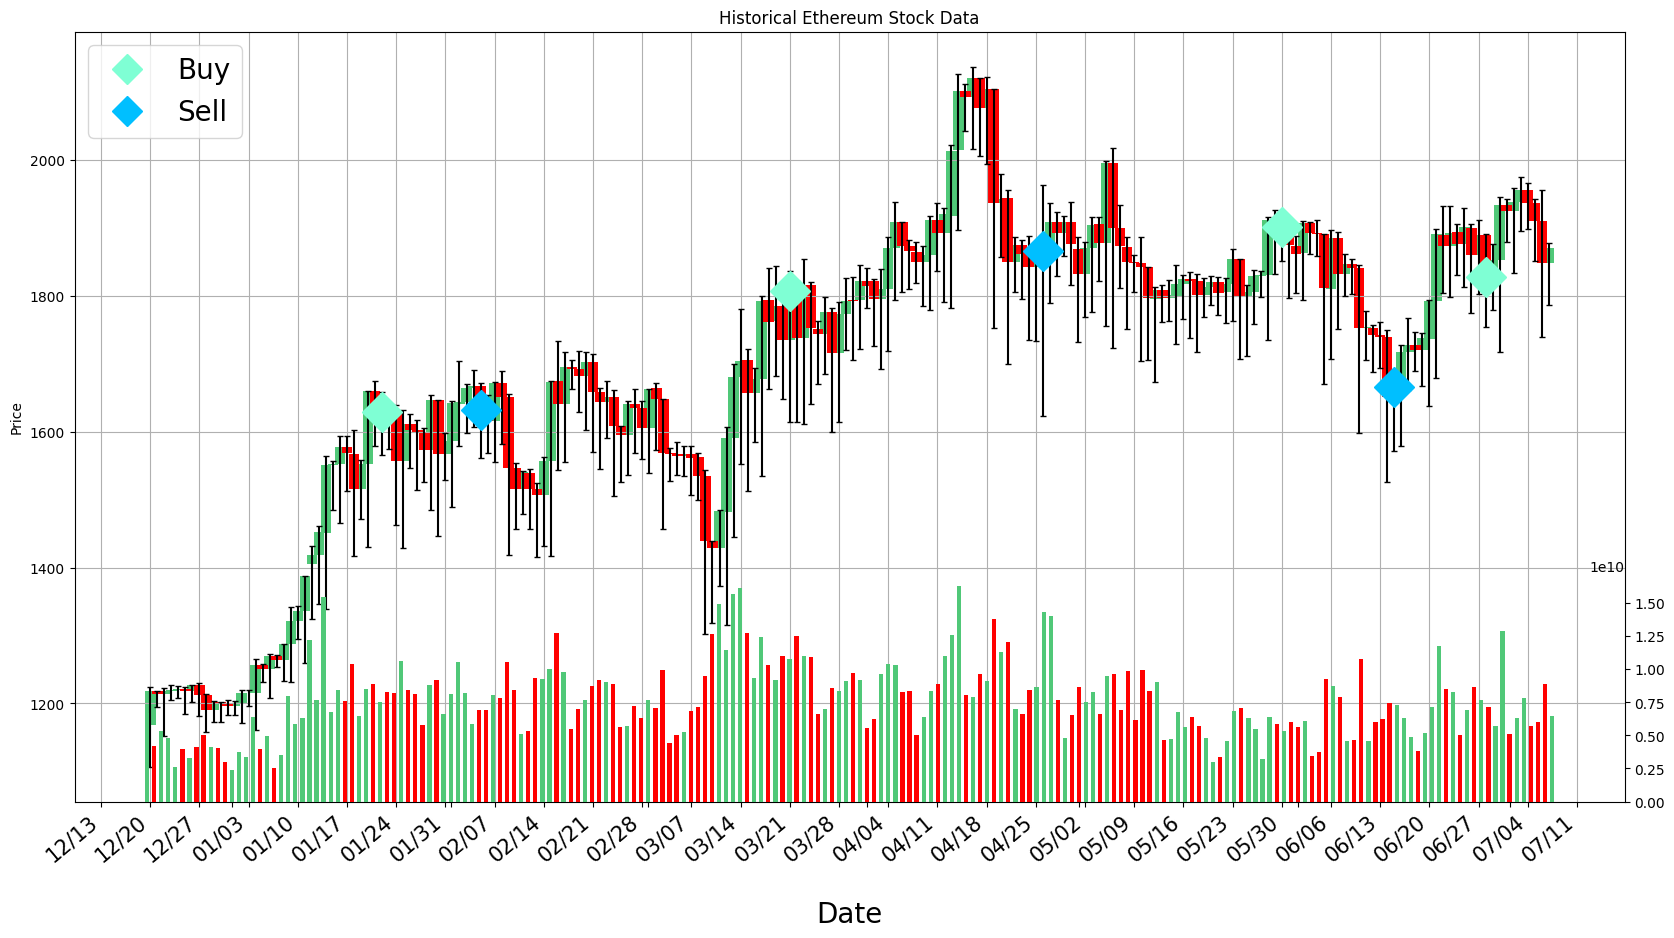

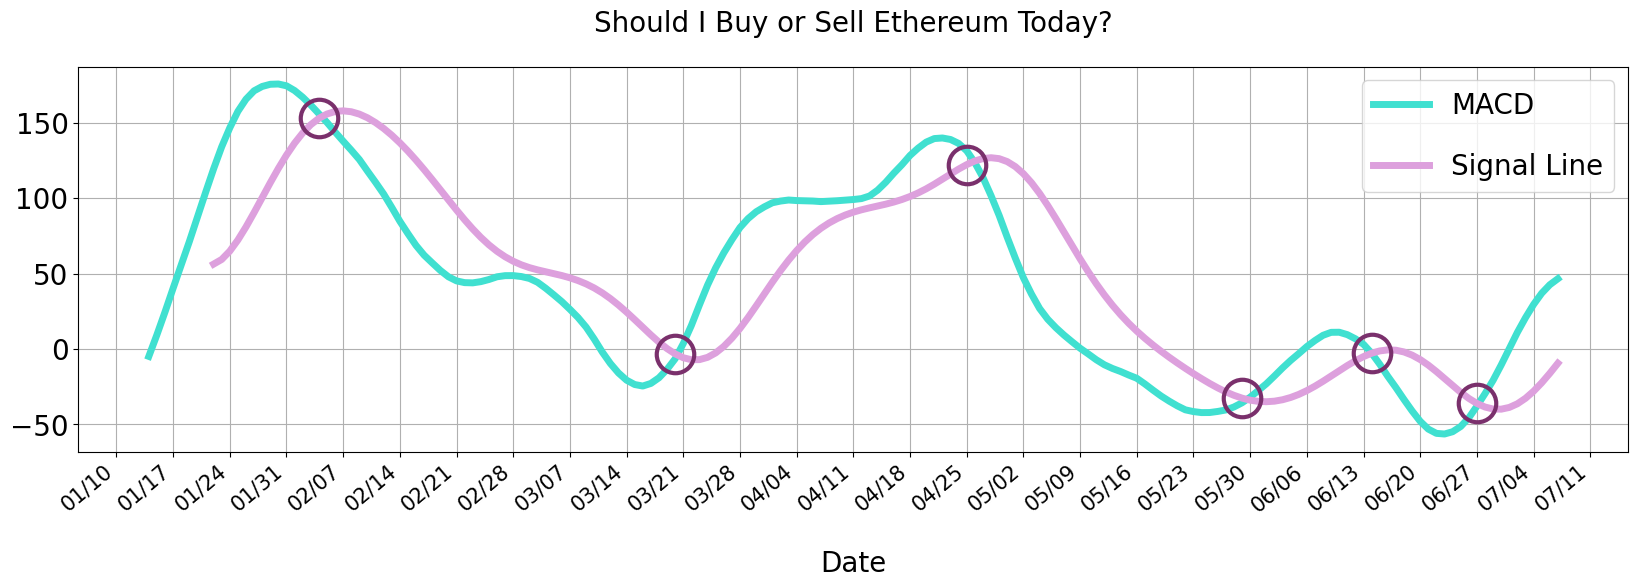

In [18]:
#sets up the CandleStick plot
setup_CandleStick()

In [17]:
def setup_CandleStick():
    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()
    # plots the candle bars and changes color depending on fluctuation of stock value
    plt.bar(eth_stock_up.index, eth_stock_up.Close - eth_stock_up.Open, 1.5, eth_stock_up.Open, color = increase_color)
    plt.errorbar(eth_stock_up.index, eth_stock_up.Low, yerr = eth_stock_up.High - eth_stock_up.Low, fmt = "none", color = "black", capsize = 2)
    plt.bar(eth_stock_down.index, eth_stock_down.Open - eth_stock_down.Close, 1.5, eth_stock_down.Close, color = decrease_color)
    plt.errorbar(eth_stock_down.index, eth_stock_down.Low, yerr = eth_stock_down.High - eth_stock_down.Low, fmt = "none", color = "black", capsize = 2)

    # plot aesthetics 
    setup_xticks(ax)
    plt.title("Historical Ethereum Stock Data")
    plt.xlabel("Date")
    plt.ylabel("Price")
    ax.grid(True)
  
    # MACD signal plot
    setup_MACD_Signals()
    plot_signals()
    plot_MACD_Signal()
    
    # Stock volume plot
    ax2 = eth_fig.add_subplot(3, 2, (5, 6))
    stockVolume_barGraph(ax2)
    
    plt.show()

Get your wallet ready! It looks like you will be able to buy some stock pretty soon!


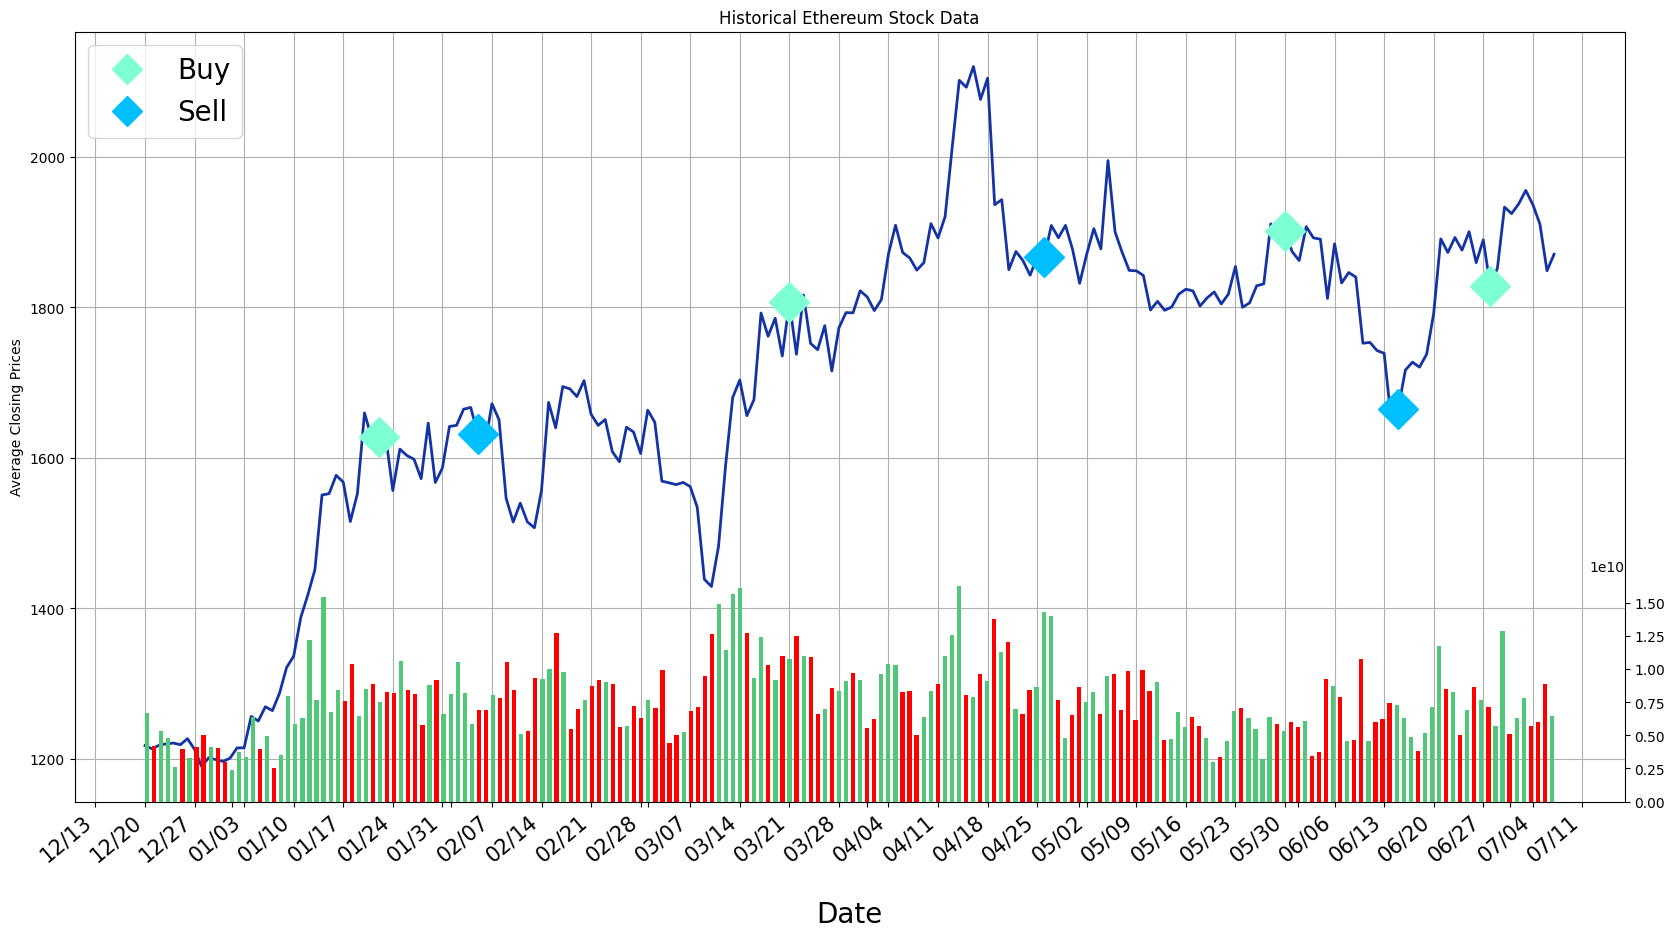

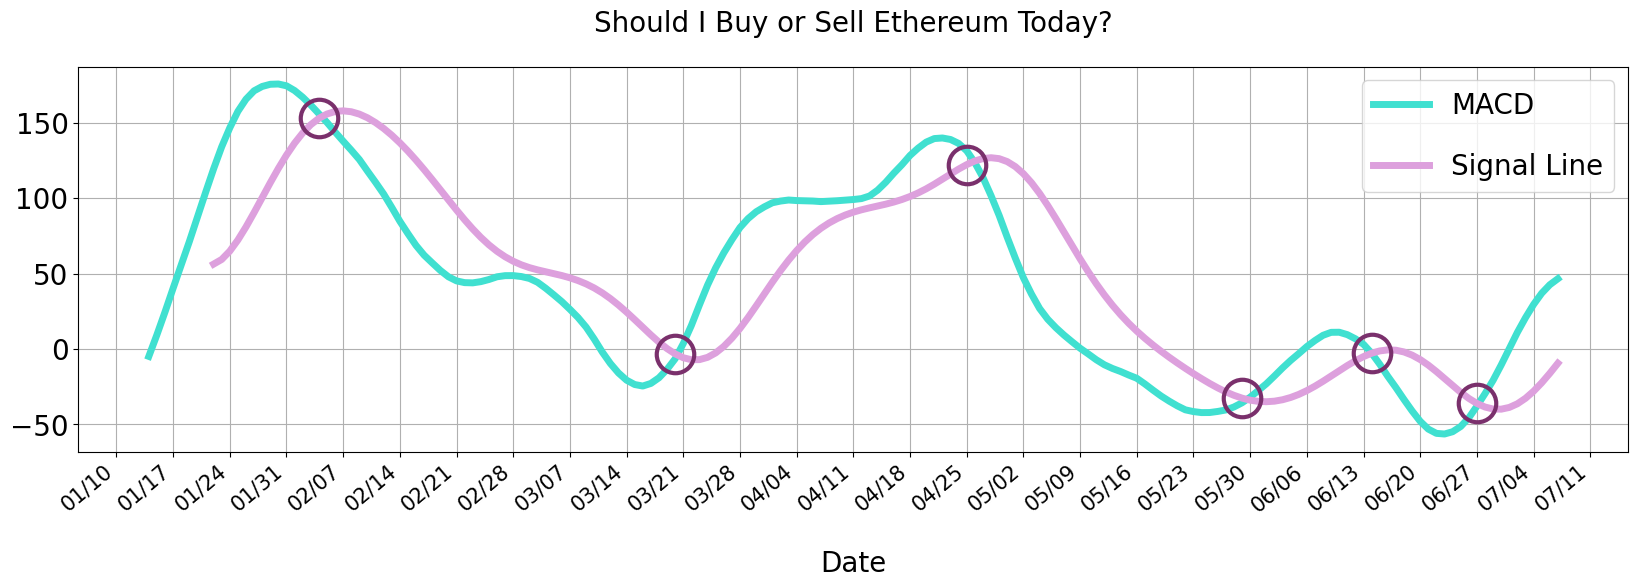

In [16]:
# sets up line plot
setup_StockPriceLinePlot()

In [15]:
def setup_StockPriceLinePlot():
    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()
    # plots stock line price fluctuation
    eth_plot = sns.lineplot(data = eth_data, x = "Date", y = "Close", color = "#1434A4", linewidth = 2)
    eth_plot.set_title("Historical Ethereum Stock Data")
    eth_plot.set_ylabel("Average Closing Prices")

    # aesthetics
    setup_xticks(ax)
    ax.grid(True)
    
    # MACD plot
    setup_MACD_Signals()
    plot_signals()
    plot_MACD_Signal()

    # Volume bar graph
    ax2 = eth_fig.add_subplot(3, 2, (5, 6))
    stockVolume_barGraph(ax2)

    plt.show()
    

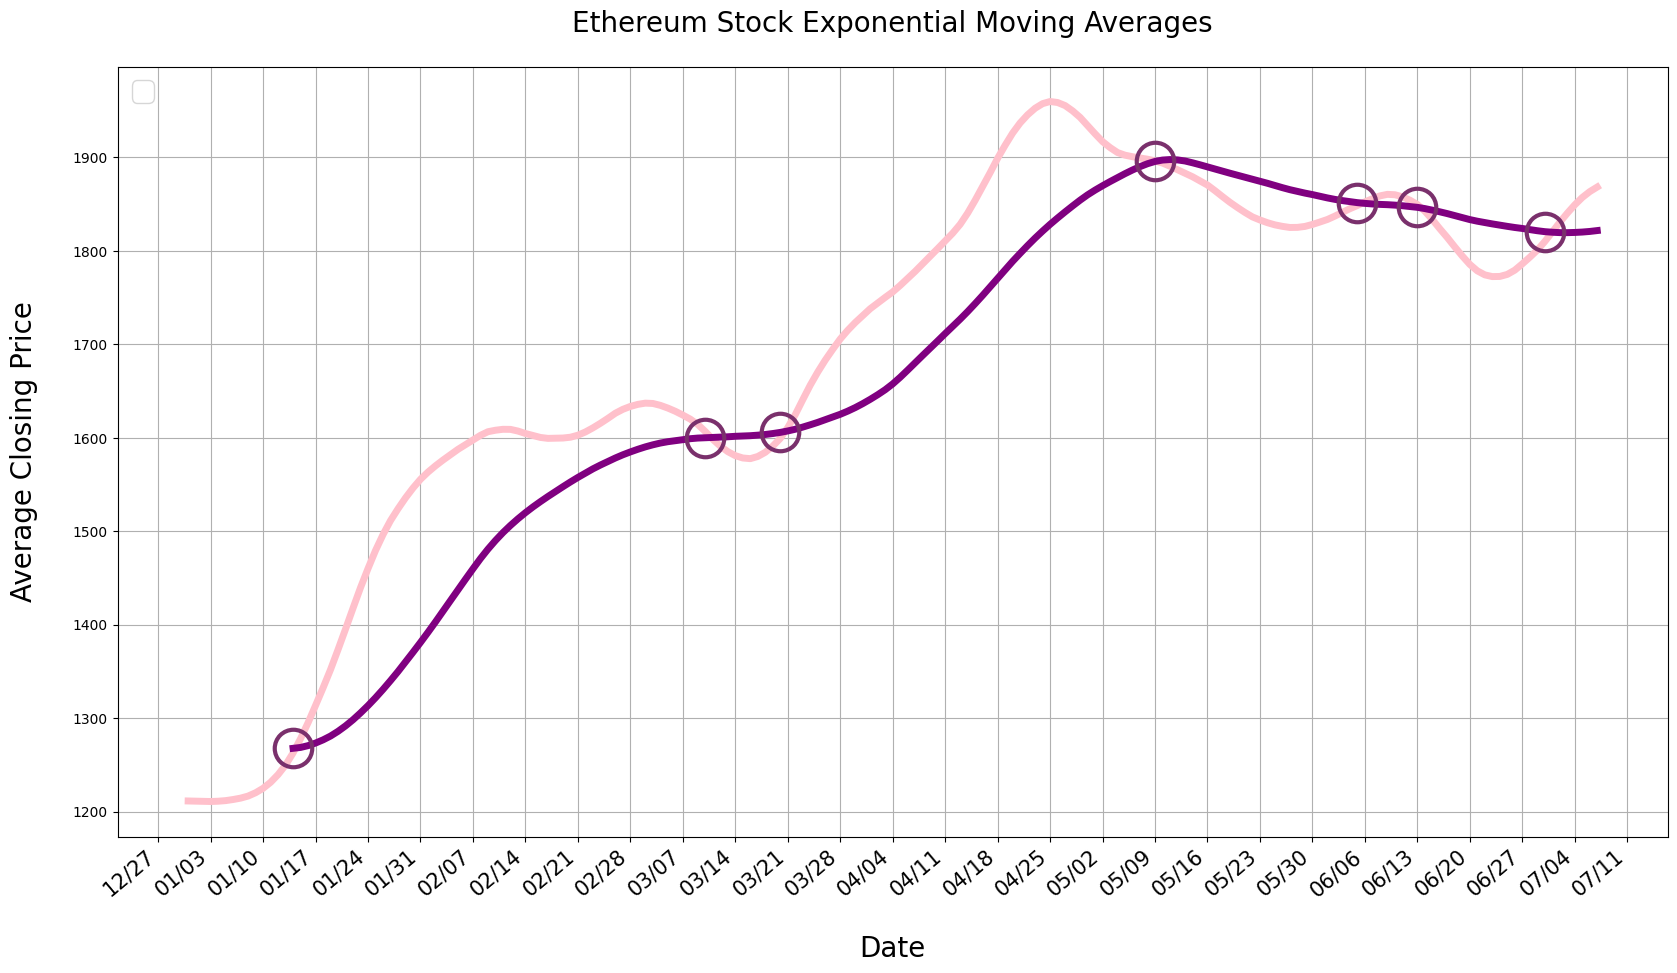

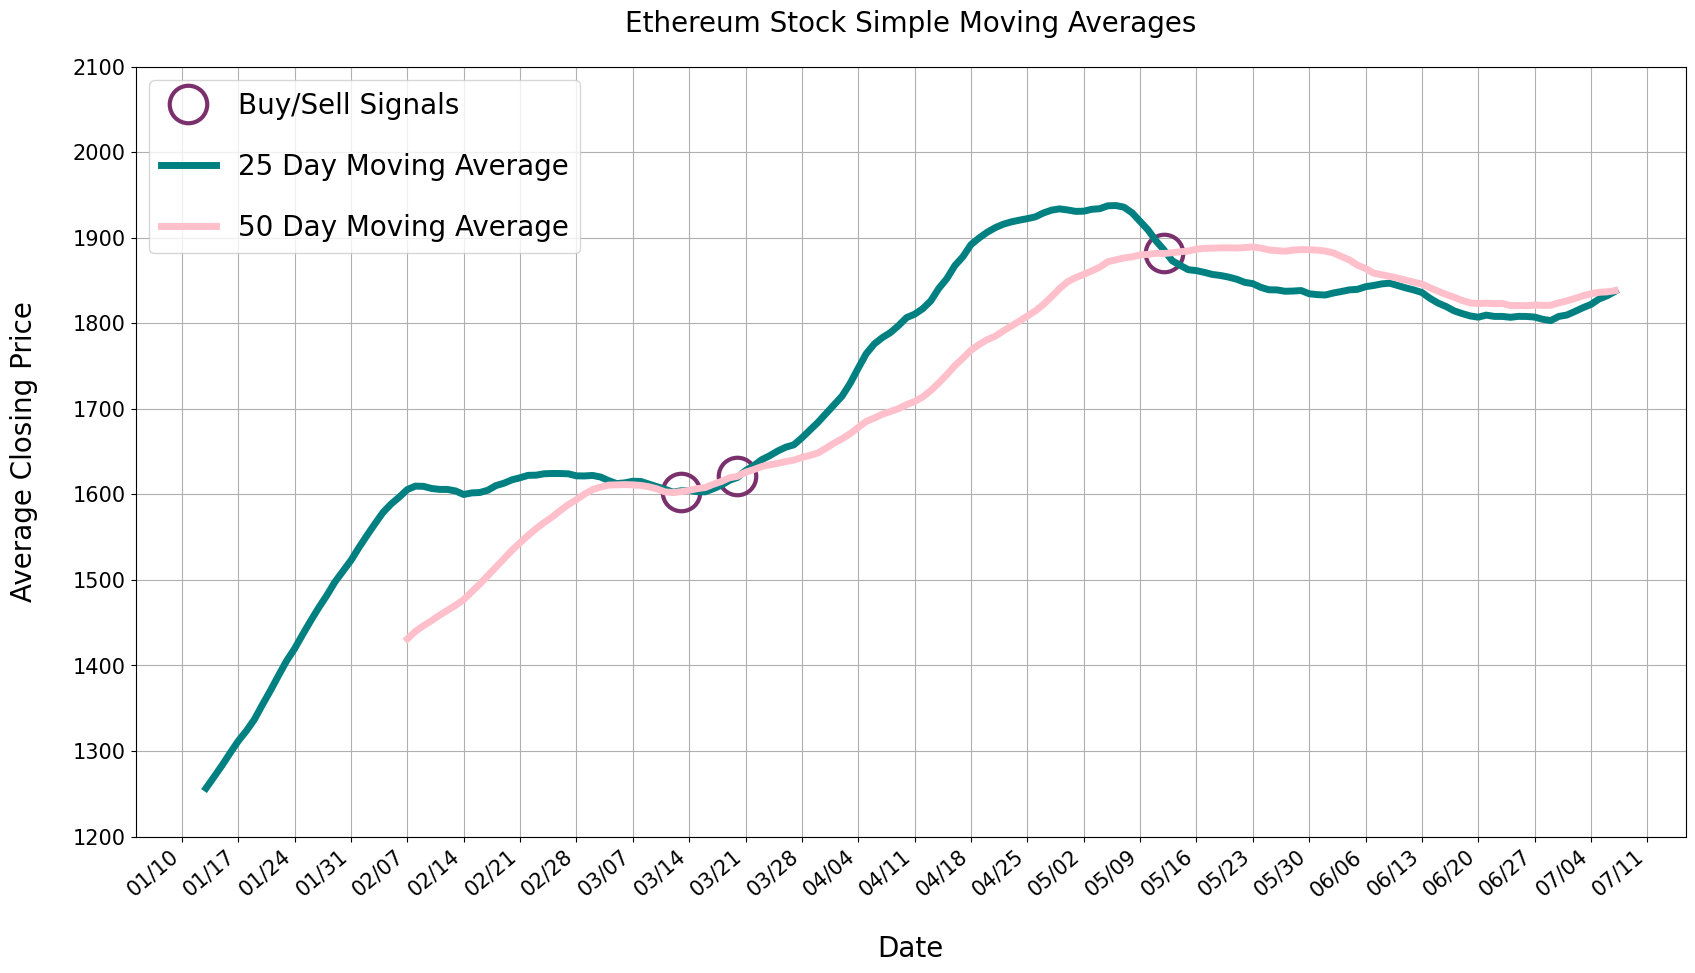

In [14]:
# sets up moving averages plots 
EMA_Graph()
SMA_Graph()


In [13]:
def SMA_Graph():

    eth_fig = plt.figure(figsize = (20, 10))
    ax = plt.subplot()

    # calculates the simple moving average
    simple_average50 = eth_data["Close"].rolling(50).mean()
    simple_average25 = eth_data["Close"].rolling(25).mean()

    dates = eth_data.index
    # calculates and plots points on graph on dates where moving averages intersect (indicates buy/sell signale)
    SMA_points = np.argwhere(np.diff(np.sign(np.array(simple_average50) - np.array(simple_average25)))).flatten()
    plt.plot(dates[SMA_points], simple_average50[SMA_points], marker = "o", color = "#7A306C", 
                 linestyle = "none", fillstyle = "none", markersize = 27, markeredgewidth = 3)

    # plots moving averages line
    plt.plot(eth_data.index, simple_average25, color = "teal", linewidth = 5)
    plt.plot(eth_data.index, simple_average50, color = "pink", linewidth = 5)

    # aesthetics
    y_ticks = np.array(list(range(1200, 2110, 100)))
    plt.yticks(y_ticks, fontsize = 15)
    plt.style.use("seaborn-v0_8-pastel")
    setup_xticks(ax)
    ax.legend(["Buy/Sell Signals", "25 Day Moving Average", "50 Day Moving Average"], loc = "upper left", labelspacing = 1.2, fontsize = 20)
    ax.set_title("Ethereum Stock Simple Moving Averages", fontsize = 20, pad = 25)
    ax.set_ylabel("Average Closing Price", fontsize = 20)
    ax.yaxis.labelpad = 25.0
    ax.set_xlabel("Date", fontsize = 20)
    ax.xaxis.labelpad = 25.0
    ax.grid(True)



In [12]:
def EMA_Graph():
    plt.figure(figsize = (20, 10))
    ax2 = plt.subplot()

    # aethetics
    ax2.set_title("Ethereum Stock Exponential Moving Averages", fontsize = 20, pad = 25)
    ax2.set_ylabel("Average Closing Price", fontsize = 20)
    ax2.yaxis.labelpad = 25.0
    setup_xticks(ax2)
    ax2.legend(["12 Day Moving Average", "26 Day Moving Average", "Buy/Sell Signals"], loc = "upper left", labelspacing = 1.2, fontsize = 20)
    ax2.grid(True)

    # plots exponential moving averages 
    plt.plot(eth_data.index, exp_12, color = "pink", linewidth = 5)
    plt.plot(eth_data.index, exp_26, color = "purple", linewidth = 5)
  
    # plots exponential moving average interection points 
    dates = eth_data.index
    expMA_points = np.argwhere(np.diff(np.sign(np.array(exp_26) - np.array(exp_12)))).flatten()
    plt.plot(dates[expMA_points], exp_26[expMA_points], marker = "o", color = "#7A306C", 
             linestyle = "none", fillstyle = "none", markersize = 27, markeredgewidth = 3)


In [11]:
def setup_xticks(ax):
    # sets x ticks every week through 200 day interval
    date_form = DateFormatter("%m/%d")
    # type of date formatter
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    # positions x ticks on like of axis
    plt.xticks(rotation = 40, ha = "right", fontsize = 15)
    ax.set_xlabel("Date", fontsize = 20)
    ax.xaxis.labelpad = 25.0

In [10]:
def stockVolume_barGraph(ax2):
    # aethetics
    ax2.xaxis.set_tick_params(labelbottom=False)
    ax2.set_facecolor("none")
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.grid(False)
    # makes the graph easier to read by removing the border of the volume graph
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # plots the volume of stock as a bar graph
    ax2.bar(eth_stock_up.index, eth_stock_up.Volume, 0.6, color = increase_color)
    ax2.bar(eth_stock_down.index, eth_stock_down.Volume, 0.6, color = decrease_color)
    

In [9]:
# calculates the simple and exponential moving averages of stock sata for the past 200 days (12 day & 26 day)
simple_average12 = eth_data["Close"].rolling(12).mean()
eth_data["Simple Average (12)"] = simple_average12
exp_12 = eth_data["Simple Average (12)"].ewm(span = 12, adjust = False).mean()

simple_average26 = eth_data["Close"].rolling(26).mean()
eth_data["Simple Average (26)"] = simple_average26
exp_26 = eth_data["Simple Average (26)"].ewm(span = 26, adjust = False).mean()

In [8]:
# calculates the MCAD line and MCAD signal line 
# indicates when to buy and/or sell a stock
def setup_MACD_Signals():
    eth_data["MACD"] = exp_12 - exp_26
    eth_data["MACD Simple Average"] = eth_data["MACD"].rolling(9).mean()
    eth_data["exp_MACD"] = eth_data["MACD Simple Average"].ewm(span = 9, adjust = False).mean()

# plots the MCAD line and MCAD signal line
# plots the buy and sell points as line markers 
def plot_MACD_Signal():
    plt.figure(figsize = (20, 5))
    ax = plt.subplot()
    # aesthetics
    ax.set_title("Should I Buy or Sell Ethereum Today?", fontsize = 20, pad = 25)
    setup_xticks(ax)
    ax.grid(True)
    plt.yticks(fontsize = 20)
    ax.grid(True)
    
    # plots the lines
    dates = eth_data.index
    plt.plot(eth_data.index, eth_data.MACD, color = "turquoise", linewidth = 5)
    plt.plot(eth_data.index, eth_data["exp_MACD"], color = "plum", linewidth = 5)
    ax.legend(["MACD", "Signal Line"], loc = "upper right", labelspacing = 1.2, fontsize = 20)
    # appends MACD and MACD signal values into the dataframe
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]

    # finds intersection points (buy or sell signals) of MACD line and MACD signal line
    MACD_numpy = np.array([eth_data["MACD"]])
    Signal_numpy = np.array(eth_data["exp_MACD"])
    Buy_Sell = np.argwhere(np.diff(np.sign(MACD_numpy - Signal_numpy))).flatten()
    plt.plot(dates[Buy_Sell], signal[Buy_Sell], marker = "o", color = "#7A306C", fillstyle = "none", markersize = 27, markeredgewidth = 3)
    # prints dialogue to the console based on buy and/or sell action of stock based on that particular day
    stockAction(Buy_Sell)

In [7]:
# prints dialogue to the console of whether the user should buy or sell their stock today
# also takes into account a "waiting period" to participate in the stock market again after recently buying or seliing
def stockAction(Buy_Sell):
    dates = eth_data.index
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]
    # indexes through dates to find buy and/or sell signals
    past_action = dates[Buy_Sell[-1]]
    past_action = past_action.to_pydatetime()
    action_trajectory = []

    # puts flags in each row correspoding to each stock activity (wait = 0, buy = 1, sell = -1)
    for i in range(len(eth_data)):
        if macd[i] < signal[i]:
            action_trajectory.append(-1)
        elif macd[i] > signal[i]:
            action_trajectory.append(1)
        else:
            action_trajectory.append(0)

    # inserts buy/sell flags into the dataframe
    eth_data["Stock Trajectory"] = action_trajectory
    today = date.today()
    today = datetime.combine(today, datetime.min.time())
    days_passed = (today - past_action).days

    # prints dialogue to the console depending on the flags
    if action_trajectory[-1] == -1:
        print("Get ready for some cold card cash! It looks like you are going have to sell your stock pretty soon!")
    elif action_trajectory[-1] == 1:
        print("Get your wallet ready! It looks like you will be able to buy some stock pretty soon!")
    elif action_trajectory[-1] == 0:
        if days_passed <= 12:
            wait = ("""Woah! Looks like the market is very volatile right now.\n 
                  You need to wait {} days before participating in the stock market again!""").format(days_passed)
            print(wait)
        else:
            if macd[Buy_Sell[-1]] > 0:
                print("You can buy your stock right now!")
            elif macd[Buy_Sell[-1]] < 0:
                print("You should sell your stock right now!")


In [6]:
# plots the buy and sell signals on the line plot and candlestick plot
def plot_signals():
    Signal_buy = []
    Signal_sell = []
    position = False
    macd = eth_data["MACD"]
    signal = eth_data["exp_MACD"]
    close = eth_data["Close"]
    
    for i in range(0, len(eth_data)):
        # position being true or false checks to see if the user very recently bought or sold stock
        # NaN is appended to the array when the user will definitley not do that particular action (buy or sell) 
        # in the stock market
        Current_close_price = close[i]
        if macd[i] > signal[i]:
            Signal_sell.append(np.nan)
            if position == False:
                Signal_buy.append(Current_close_price)
                position = True
            else:
                Signal_buy.append(np.nan)
        elif macd[i] < signal[i]:
            Signal_buy.append(np.nan)
            if position == True:
                Signal_sell.append(Current_close_price)
                position = False
            else:
                Signal_sell.append(np.nan)
        else:
            Signal_buy.append(np.nan)
            Signal_sell.append(np.nan)
    
    # makes the array of the buy and sell points a line to graph on the plots
    Buy_points = mlines.Line2D([], [], color = "aquamarine", marker = "D", linestyle='None',
                          markersize = 15, label = "Buy")
    Sell_points = mlines.Line2D([], [], color = "deepskyblue", marker = "D", linestyle='None',
                          markersize = 15, label = "Sell")
    
    # plots buy and sell markers 
    plt.plot(eth_data.index, Signal_buy, color = "aquamarine", marker = "D", markersize = 20)
    plt.plot(eth_data.index, Signal_sell, color = "deepskyblue", marker = "D", markersize = 20)
    plt.legend(handles = [Buy_points, Sell_points], fontsize = 20, loc = "upper left")
    
